In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
    using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding, CairoMakie, JLD2
    include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
    include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");
else
    username = "nova"
    pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding, CairoMakie, JLD2
    include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
    include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")
end

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

plot_3d_2c_fp (generic function with 1 method)

In [2]:
"""username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");""";

In [12]:
time = 6000.0; tt = 0.0; tstep = 0.001;
tol = 1e-12
integ_set = (alg = Vern9(), adaptive = true, abstol = tol, reltol = tol);

In [13]:
u0 = zeros(6);
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [5]:
"""for elem in dict
    println(elem);
end;"""
;

In [6]:
# Первое появление кисти
# I0 = -1.7802
# u0 = [0.9401953832084715, 0.7411256095987793, 0.7440065013659322, 0.05604540199363639, 0.014096429160725683, 0.005545273502305856]
;

In [14]:
param[11] =  -1.85

-1.85

In [80]:
param

26-element Vector{Float64}:
  0.013
  0.15
  1.0
  1.8
  1.5
  5.0
  0.001
  0.01
  3.07
  0.3
  ⋮
  1.0
  0.15
 25.6
  0.0
  1.0
 26.0
  0.05
  0.5
  0.9

In [ ]:
ds= CoupledODEs(TM6_glial_ECM, [9.916334771244077, 0.4493327135110199, 0.8238994432355461, 9.586057235847873e-5, 0.026918144834761848, 0.00039124025946195865], param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);

In [18]:
xlabsize = 55; ylabsize = 55; zlabsize = 55
textsize = 55;
ticksize = 40;
lw = 1.5;
spinewidth = 3.0;
color1 = :red;
color2 = :blue;
gridvisible = false;

In [65]:
cd("Images")

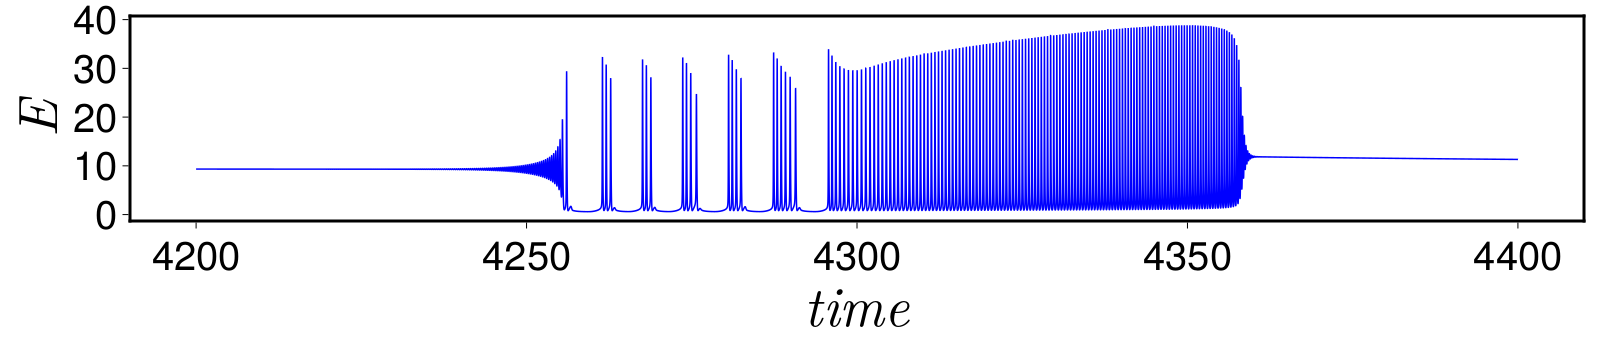

CairoMakie.Screen{EPS}


In [66]:
plt_start = 4200000; plt_end = 4400000;

width_ = 1600; height_ = 350;
xlab = L"time"; ylab = L"E";

f = Figure(resolution = (width_, height_))
ax = Axis(f[1, 1],
xlabel = xlab, ylabel = ylab, xlabelsize = xlabsize, ylabelsize = ylabsize,
xticklabelsize = ticksize, yticklabelsize = ticksize,
xgridvisible = gridvisible, ygridvisible = gridvisible,
spinewidth = spinewidth);

lines!(trange[plt_start:plt_end], tr[plt_start:plt_end, 1], linewidth = lw, color = color2);

display(f)

save("timeseries_brush.eps", f)

In [44]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 1.0), interval(-1.0, 1.0);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-15, method = IntervalRootFinding.Krawczyk);
println("Number of fp:", length(fp));

Number of fp:5


In [84]:
fp

6-dimensional StateSpaceSet{Float64} with 5 points
  8.52641   0.493259  0.803256  0.000231051  3.68898e-49   1.68409e-152
 25.9271    0.218391  0.920256  9.47042e-7   0.452151      0.188714
  3.30589   0.756655  0.648553  0.042427     2.83097e-64  -1.70253e-125
 25.1344    0.224158  0.918036  1.06281e-6   0.429424      3.03034e-8
  0.871489  0.927088  0.60162   0.498445     2.53295e-71   8.27338e-106

In [82]:
eigs[2]

6-element Vector{ComplexF64}:
 -12.588586680288147 - 39.707254100130974im
 -12.588586680288147 + 39.707254100130974im
  -8.850048694621416 + 0.0im
  -0.555555555555556 + 0.0im
 0.09088193013006926 - 0.19553023285931523im
 0.09088193013006926 + 0.19553023285931523im

In [83]:
eigs[4]

6-element Vector{ComplexF64}:
   -12.054136058710316 - 39.14241029985035im
   -12.054136058710316 + 39.14241029985035im
    -8.607018049577828 + 0.0im
   -0.5555555555555557 + 0.0im
 -0.009999913177236404 + 0.0im
   0.09488821621371868 + 0.0im

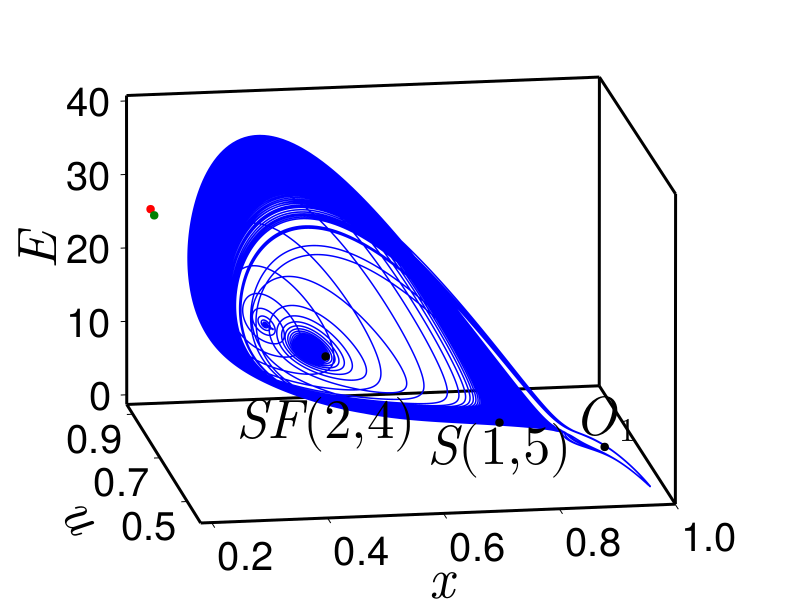

CairoMakie.Screen{EPS}


In [79]:
plt_start = 4200000; plt_end = 4400000;

index_x, index_y, index_z = 2, 3, 1;

width_ = 800; height_ = 600;
xlab = L"x"; ylab = L"u"; zlab = L"E";

azim = -0.55pi; elev = 0.08pi;

prot = 60;
disx = 40; disy = 70; disz = 60
mksize = 10;

colordot = :black

spinewidth = 3.0;

f = Figure(resolution = (width_, height_));
ax = Axis3(f[1, 1], azimuth = azim, elevation = elev,
                xlabel = xlab, ylabel = ylab, zlabel = zlab,
                xlabelsize = xlabsize, ylabelsize = ylabsize, zlabelsize = zlabsize,
                xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
                xgridvisible = gridvisible, ygridvisible = gridvisible, zgridvisible = gridvisible,
                protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
                xspinewidth = spinewidth, yspinewidth = spinewidth, zspinewidth = spinewidth, yticks = [0.5, 0.7, 0.9])

lines!(ax, tr[plt_start:plt_end, index_x], tr[plt_start:plt_end, index_y], tr[plt_start:plt_end, index_z], color = color2)

scatter!(ax, fp[3, index_x], fp[3, index_y], fp[3, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[3, index_x], fp[3, index_y], fp[3, index_z], text = L"S(1,5)", fontsize = textsize, align = (:center, :bottom), offset = (0, -55))

scatter!(ax, fp[1, index_x], fp[1, index_y], fp[1, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[1, index_x], fp[1, index_y], fp[1, index_z], text = L"SF(2,4)", fontsize = textsize, align = (:center, :baseline), offset = (0,-95))


scatter!(ax, fp[5, index_x], fp[5, index_y], fp[5, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[5, index_x], fp[5, index_y], fp[5, index_z], text = L"O_1", fontsize = textsize, align = (:baseline, :bottom))


scatter!(ax, fp[2, index_x], fp[2, index_y], fp[2, index_z], markerksize = mksize, color = :red);
scatter!(ax, fp[4, index_x], fp[4, index_y], fp[4, index_z], markerksize = mksize, color = :green);

display(f)

save("phase_port_brush.eps", f)